In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
data = pd.read_csv("exams.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [7]:
X = data.drop('gender', axis=1)
y = data['gender']


X = pd.get_dummies(X, drop_first=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)  


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# Побудова моделі для двокласової класифікації
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Для двокласової класифікації з активацією sigmoid

# Компіляція моделі з binary_crossentropy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train[:, 0], epochs=50, batch_size=32, validation_split=0.2)  # Вибираємо одну колонку y_train для позначення класів 0 і 1


test_loss, test_accuracy = model.evaluate(X_test, y_test[:, 0])
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/50


20/20 [==============================] - 1s 13ms/step - loss: 0.7034 - accuracy: 0.4875 - val_loss: 0.6811 - val_accuracy: 0.5562
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6616 - accuracy: 0.6250 - val_loss: 0.6570 - val_accuracy: 0.6000
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6259 - accuracy: 0.6938 - val_loss: 0.6282 - val_accuracy: 0.6687
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5860 - accuracy: 0.7500 - val_loss: 0.5916 - val_accuracy: 0.7188
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.7844 - val_loss: 0.5475 - val_accuracy: 0.7688
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4950 - accuracy: 0.8141 - val_loss: 0.5007 - val_accuracy: 0.7937
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4461 - accuracy: 0.8297 - val_loss: 0.4492 - val_accuracy: 0.8438
Epoch 8/50
20/20 

In [8]:
from sklearn.metrics import classification_report

# Оцінка моделі та отримання передбачень
y_pred = (model.predict(X_test) > 0.5).astype("int32")  

y_test_labels = y_test[:, 0]  
y_pred_labels = y_pred[:, 0]  

test_loss, test_accuracy = model.evaluate(X_test, y_test_labels)
print(f"Test Accuracy: {test_accuracy:.2f}")


print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels, target_names=['Class 0', 'Class 1']))

7/7 [==============================] - 0s 2ms/step - loss: 0.2192 - accuracy: 0.9000
Test Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.90      0.91      0.91       105
     Class 1       0.90      0.88      0.89        95

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



Навчання моделі: kNN

Результати для моделі: kNN
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        95
           1       0.78      0.82      0.80       105

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200


Confusion Matrix:
[[71 24]
 [19 86]]


Навчання моделі: Decision Tree

Результати для моделі: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        95
           1       0.86      0.86      0.86       105

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200


Confusion Matrix:
[[80 15]
 [15 90]]


Навчання моделі: SVM

Результати для моделі: SVM
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.96      0.91      0.94       105

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200


Confusion Matrix:
[[91  4]
 [ 9 96]]


Навчання моделі: Random Forest

Результати для моделі: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        95
           1       0.92      0.91      0.92       105

    accuracy                           0.92       200
   macro avg       0.91      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200


Confusion Matrix:
[[87  8]
 [ 9 96]]


Навчання моделі: AdaBoost

Результати для моделі: AdaBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        95
           1       0.94      0.90      0.92       105

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



# 2 пункт

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt

In [3]:
# Параметри моделі
img_height, img_width = 150, 150
batch_size = 32

# Попередня обробка даних
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    "images",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    "images",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


num_classes = len(train_generator.class_indices)

Found 288 images belonging to 9 classes.
Found 71 images belonging to 9 classes.


In [21]:
# Попередня обробка даних з аугментацією
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

def build_model_from_scratch():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_scratch = build_model_from_scratch()
history_scratch = model_scratch.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    ]
)


Epoch 1/30
9/9 [==============================] - 11s 1s/step - loss: 2.3136 - accuracy: 0.0938 - val_loss: 2.1067 - val_accuracy: 0.2676 - lr: 0.0010
Epoch 2/30
9/9 [==============================] - 9s 1s/step - loss: 2.0306 - accuracy: 0.2292 - val_loss: 1.7716 - val_accuracy: 0.2958 - lr: 0.0010
Epoch 3/30
9/9 [==============================] - 9s 1s/step - loss: 1.8674 - accuracy: 0.2847 - val_loss: 1.6026 - val_accuracy: 0.4648 - lr: 0.0010
Epoch 4/30
9/9 [==============================] - 10s 1s/step - loss: 1.6663 - accuracy: 0.3715 - val_loss: 1.4464 - val_accuracy: 0.4648 - lr: 0.0010
Epoch 5/30
9/9 [==============================] - 10s 1s/step - loss: 1.4825 - accuracy: 0.4618 - val_loss: 1.3184 - val_accuracy: 0.5493 - lr: 0.0010
Epoch 6/30
9/9 [==============================] - 11s 1s/step - loss: 1.5201 - accuracy: 0.4444 - val_loss: 1.3549 - val_accuracy: 0.5352 - lr: 0.0010
Epoch 7/30
9/9 [==============================] - 10s 1s/step - loss: 1.3202 - accuracy: 0.5035 

In [6]:
def build_model_with_transfer_learning():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_transfer = build_model_with_transfer_learning()
history_transfer = model_transfer.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

9406464/9406464 [==============================] - 15s 2us/step
Epoch 1/10
9/9 [==============================] - 13s 1s/step - loss: 1.3615 - accuracy: 0.5451 - val_loss: 0.5165 - val_accuracy: 0.8732
Epoch 2/10
9/9 [==============================] - 9s 998ms/step - loss: 0.3215 - accuracy: 0.8958 - val_loss: 0.2925 - val_accuracy: 0.9014
Epoch 3/10
9/9 [==============================] - 9s 1s/step - loss: 0.1069 - accuracy: 0.9722 - val_loss: 0.2748 - val_accuracy: 0.9155
Epoch 4/10
9/9 [==============================] - 9s 1s/step - loss: 0.0496 - accuracy: 0.9931 - val_loss: 0.2793 - val_accuracy: 0.8873
Epoch 5/10
9/9 [==============================] - 9s 1s/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 0.2465 - val_accuracy: 0.9155
Epoch 6/10
9/9 [==============================] - 9s 1s/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.2419 - val_accuracy: 0.9155
Epoch 7/10
9/9 [==============================] - 10s 1s/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.


Результати навчання з нуля:


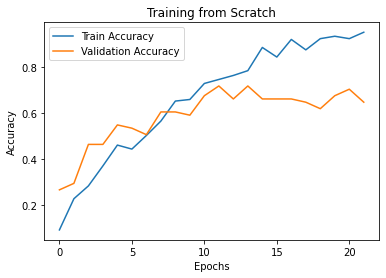


Результати перенесення навчання:


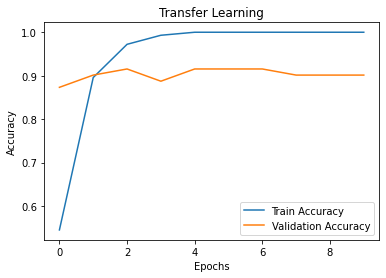

In [22]:
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

print("\nРезультати навчання з нуля:")
plot_history(history_scratch, "Training from Scratch")

print("\nРезультати перенесення навчання:")
plot_history(history_transfer, "Transfer Learning")

In [23]:
def evaluate_model(model, generator, title):
    results = model.evaluate(generator)
    metrics = dict(zip(model.metrics_names, results))
    print(f"\n{title} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

print("\nОцінка моделі, навченої з нуля:")
evaluate_model(model_scratch, validation_generator, "Model from Scratch")

print("\nОцінка моделі з перенесенням навчання:")
evaluate_model(model_transfer, validation_generator, "Transfer Learning Model")



Оцінка моделі, навченої з нуля:
3/3 [==============================] - 1s 342ms/step - loss: 1.0116 - accuracy: 0.7183

Model from Scratch Metrics:
loss: 1.0116
accuracy: 0.7183

Оцінка моделі з перенесенням навчання:
3/3 [==============================] - 2s 403ms/step - loss: 0.2575 - accuracy: 0.9014

Transfer Learning Model Metrics:
loss: 0.2575
accuracy: 0.9014


# 3 пункт


In [3]:
data = pd.read_csv("spam_t.csv", sep=";")

In [4]:
data

,title,text,type,cleaned_text
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam,hi james claim complimentary gift yet ive comp...
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam,alttext congratulations earned 500 completed f...
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam,heres github launch code mortyj420 octocat sta...
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam,hello thank contacting virtual reward center v...
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam,hey prachanda rawal todays newsletter jampacke...
...,...,...,...,...
79,Your application for the position of Child Pr...,"Dear Maryam, \n\n \n\nI would like to thank yo...",not spam,dear maryam would like thank application role ...
80,Your Kilimall Account is Ready - Shopping Now!,"Dear Customer,\n\nWelcome to Kilimall, Thanks ...",not spam,dear customer welcome kilimall thanks much joi...
81,Your Steam account: Access from new web or mob...,"Dear vladis163rus,\nHere is the Steam Guard co...",not spam,dear vladis163rus steam guard code need login ...
82,Your uploaded document is rejected,View In Browser | Log in\n \n \n\nSkrill logo\...,not spam,view browser log skrill logo money movers make...


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:

max_words = 10000  
max_len = 50  
embedding_dim = 100


tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['cleaned_text'])
sequences = tokenizer.texts_to_sequences(data['cleaned_text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len)


labels = pd.get_dummies(data['type']).values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [11]:
# a. мережа і embedding шар з нуля
def build_model_from_scratch():
    model = Sequential([
        Embedding(max_words, embedding_dim, input_length=max_len),
        Bidirectional(LSTM(64, return_sequences=True)),
        Dropout(0.5),
        LSTM(32),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_scratch = build_model_from_scratch()
model_scratch.summary()


history_scratch = model_scratch.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 100)           1000000   
                                                                 
 bidirectional_2 (Bidirecti  (None, 50, 128)           84480     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 50, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                20608     
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1105154 (4.22 MB)
Trainable params: 1105154 (4.22 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [12]:
# b.pretrained word embeddings
def load_pretrained_embeddings():
    embeddings_index = {}
    with open('glove.6B.100d.txt', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    
    embedding_matrix = np.zeros((max_words, embedding_dim))
    for word, i in tokenizer.word_index.items():
        if i < max_words:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
    return embedding_matrix

embedding_matrix = load_pretrained_embeddings()

def build_model_with_pretrained_embeddings():
    model = Sequential([
        Embedding(max_words, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False),
        Bidirectional(LSTM(64, return_sequences=True)),
        Dropout(0.5),
        LSTM(32),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_pretrained = build_model_with_pretrained_embeddings()
model_pretrained.summary()


history_pretrained = model_pretrained.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 100)           1000000   
                                                                 
 bidirectional_3 (Bidirecti  (None, 50, 128)           84480     
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 50, 128)           0         
                                                                 
 lstm_7 (LSTM)               (None, 32)                20608     
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1105154 (4.22 MB)
Trainable params: 105154 (410.76 KB)
Non-trainable params: 1000000 (3.81 MB)
___________

In [13]:
# Evaluate both models
results_scratch = model_scratch.evaluate(X_test, y_test, verbose=0)
results_pretrained = model_pretrained.evaluate(X_test, y_test, verbose=0)

print("Model trained from scratch - Loss: {:.4f}, Accuracy: {:.4f}".format(results_scratch[0], results_scratch[1]))
print("Model with pretrained embeddings - Loss: {:.4f}, Accuracy: {:.4f}".format(results_pretrained[0], results_pretrained[1]))

Model trained from scratch - Loss: 0.6501, Accuracy: 0.6471
Model with pretrained embeddings - Loss: 0.6769, Accuracy: 0.6471
